In [33]:
import pandas as pd 

#### Load the data

In [34]:
data = pd.read_csv("StressLevelDataset.csv")

#### Details

In [35]:
print(f"no of columns: {data.shape[1]}")
print(f"no of rows: {data.shape[0]}")

no of columns: 21
no of rows: 1102


### Let's look at some of the data

In [36]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,0.0,11.0,2.0,1,2.0,4.0,2.0,3.0,...,2.0,3.0,2.0,3.0,3,2.0,3.0,3.0,2.0,1.0
1,15.0,8.0,1.0,15.0,5.0,3,1.0,4.0,3.0,1.0,...,2.0,1.0,4.0,1.0,5,1.0,4.0,5.0,5.0,2.0
2,12.0,18.0,1.0,14.0,2.0,1,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,3.0,2,2.0,3.0,2.0,2.0,1.0
3,16.0,12.0,1.0,15.0,4.0,3,1.0,3.0,4.0,2.0,...,2.0,2.0,4.0,1.0,4,1.0,4.0,4.0,5.0,2.0
4,16.0,28.0,0.0,7.0,2.0,3,5.0,1.0,3.0,2.0,...,3.0,4.0,3.0,1.0,2,1.0,5.0,0.0,5.0,1.0


### Convert all data into integer in case there is a non-integer value

In [37]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [38]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,0.0,11.0,2.0,1,2.0,4.0,2.0,3.0,...,2.0,3.0,2.0,3.0,3,2.0,3.0,3.0,2.0,1.0
1,15.0,8.0,1.0,15.0,5.0,3,1.0,4.0,3.0,1.0,...,2.0,1.0,4.0,1.0,5,1.0,4.0,5.0,5.0,2.0
2,12.0,18.0,1.0,14.0,2.0,1,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,3.0,2,2.0,3.0,2.0,2.0,1.0
3,16.0,12.0,1.0,15.0,4.0,3,1.0,3.0,4.0,2.0,...,2.0,2.0,4.0,1.0,4,1.0,4.0,4.0,5.0,2.0
4,16.0,28.0,0.0,7.0,2.0,3,5.0,1.0,3.0,2.0,...,3.0,4.0,3.0,1.0,2,1.0,5.0,0.0,5.0,1.0


##### Let's visualize the data

array([[<AxesSubplot:title={'center':'anxiety_level'}>,
        <AxesSubplot:title={'center':'self_esteem'}>],
       [<AxesSubplot:title={'center':'mental_health_history'}>,
        <AxesSubplot:title={'center':'depression'}>],
       [<AxesSubplot:title={'center':'headache'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>]], dtype=object)

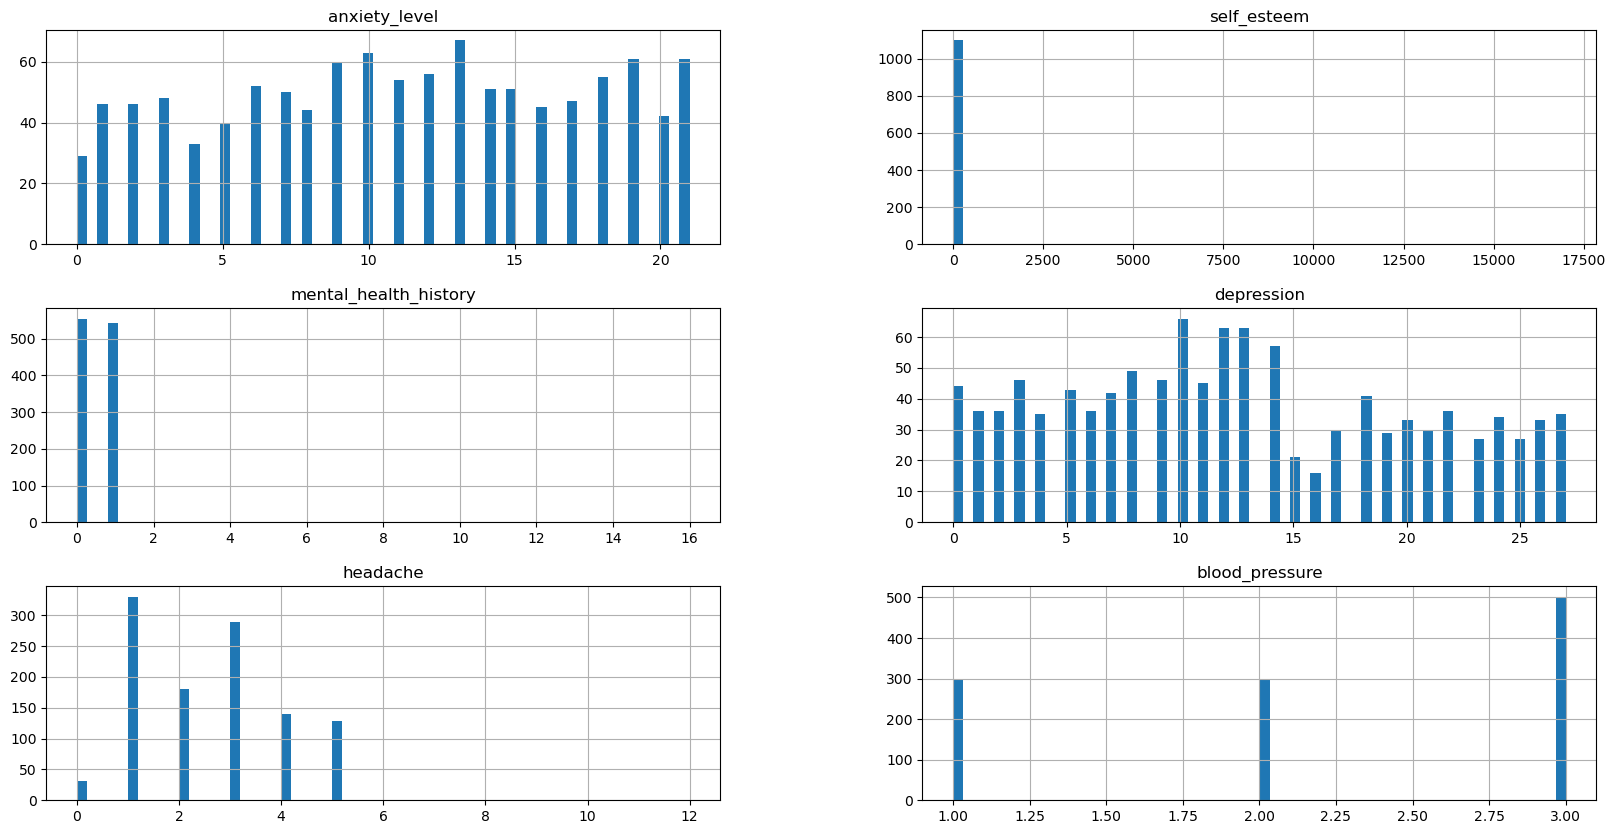

In [39]:
data[["anxiety_level", "self_esteem", "mental_health_history", "depression", "headache", "blood_pressure"]].hist(bins= 60, figsize=(20,10))

<AxesSubplot:xlabel='anxiety_level'>

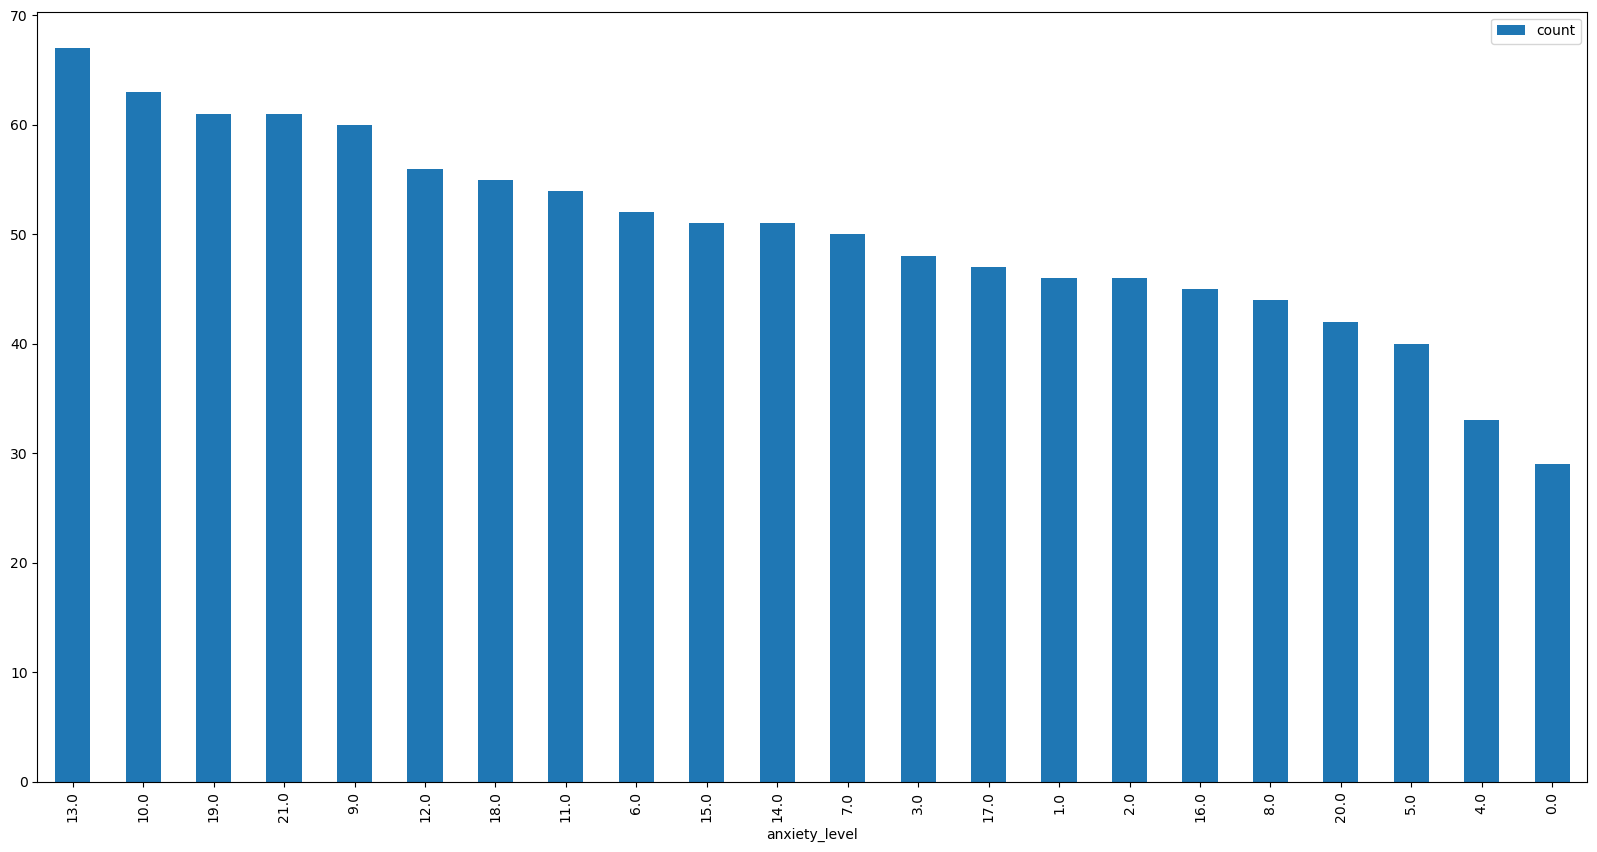

In [40]:
pd.DataFrame(data["anxiety_level"].value_counts()).plot(kind='bar', figsize=(20, 10))

### Remove any duplicates

let's check how much duplicate values we have

In [41]:
duplicates = data.duplicated().sum()

In [42]:
if duplicates > 0:
    data.drop_duplicates(inplace=True)  

after deroping the duplicates

In [43]:
data.duplicated().sum()

0

#### Add a unique index identifier for each student

In [44]:
data.insert(0, 'student_id', 'student_' + data.index.astype(str))

In [45]:
data.head()

,student_id,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,student_0,14.0,20.0,0.0,11.0,2.0,1,2.0,4.0,2.0,...,2.0,3.0,2.0,3.0,3,2.0,3.0,3.0,2.0,1.0
1,student_1,15.0,8.0,1.0,15.0,5.0,3,1.0,4.0,3.0,...,2.0,1.0,4.0,1.0,5,1.0,4.0,5.0,5.0,2.0
2,student_2,12.0,18.0,1.0,14.0,2.0,1,2.0,2.0,2.0,...,2.0,2.0,3.0,3.0,2,2.0,3.0,2.0,2.0,1.0
3,student_3,16.0,12.0,1.0,15.0,4.0,3,1.0,3.0,4.0,...,2.0,2.0,4.0,1.0,4,1.0,4.0,4.0,5.0,2.0
4,student_4,16.0,28.0,0.0,7.0,2.0,3,5.0,1.0,3.0,...,3.0,4.0,3.0,1.0,2,1.0,5.0,0.0,5.0,1.0


### Save the cleaned data in a new csv file

In [46]:
data.to_csv("cleaned_data.csv", index=False)